In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as lm
import sys
sys.path.append('C:\\Users\\Irisi\\spotify-song-popularity')
import exp


#to perform the train test split of the data, the train test split function is imported from sklearn
from sklearn.model_selection import train_test_split
#the given problem is a classificaton problem. Hence linear regression is used for ML algorithm
from sklearn.linear_model import LinearRegression

In [6]:
# Read the file
file = "Resources/features/features_45k.csv"
tds1 = pd.read_csv(file)
tds1.columns

Index(['0', 'Artist', 'Track', 'Unnamed: 0', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'followers', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo',
       'time_signature', 'valence'],
      dtype='object')

In [7]:
# keep only relevant columns
tds1 = tds1[['Artist', 'Track', 'followers','instrumentalness','popularity','acousticness', 'danceability', 'duration_ms', 'energy', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]
tds1.head()

,Artist,Track,followers,instrumentalness,popularity,acousticness,danceability,duration_ms,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Lionel Richie,Tonight Will Be Alright,1627956,0.014100,38,0.05910,0.646,307413,0.840,8,0.0516,-8.213,1,0.0283,125.187,4,0.716
1,Course Of Nature,The Window,10469,0.000035,11,0.00119,0.496,191160,0.928,1,0.0988,-2.367,0,0.0469,144.932,4,0.561
2,Mariah Carey,Inseparable,5505368,0.000000,31,0.09090,0.586,213720,0.692,8,0.0567,-5.143,1,0.1770,158.041,4,0.457
3,Extra Virgin,One Night,880039,0.002050,0,0.00361,0.643,210667,0.896,0,0.9010,-6.662,1,0.0359,130.011,4,0.338
4,Joe and Will Ask?,Claymore,13,0.776000,2,0.00328,0.699,119053,0.974,9,0.2900,-5.576,0,0.1500,125.934,4,0.443


In [8]:
#tds1 = tds1.head(5000)
tds1.shape

(45157, 17)

## Closer Look at Target Variable

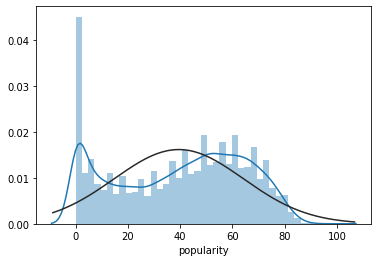

<Figure size 432x288 with 0 Axes>

In [11]:
#histogram 
sns.distplot(tds1['popularity'], fit=norm);
fig = plt.figure()
#res = stats.probplot(tds1['popularity'], plot=plt)
plt.savefig('Images/Regression/Histogram Popularity.png')

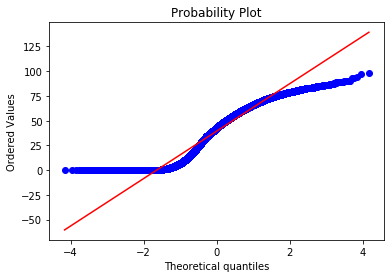

In [12]:
# Normal Probability Plot
fig = plt.figure()
res = stats.probplot(tds1['popularity'], plot=plt)
plt.savefig('Images/Regression/Normal Probability Plot.png')

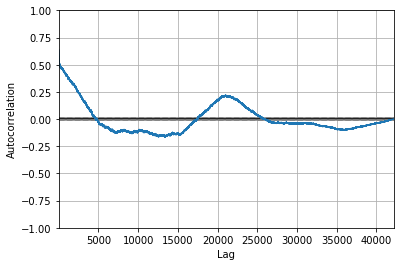

In [49]:
# create an autocorrelation plot
from pandas.plotting import autocorrelation_plot
series = tds1['popularity']
autocorrelation_plot(series)
pyplot.show()
plt.savefig('Images/Regression/autocorrelation plot.png')

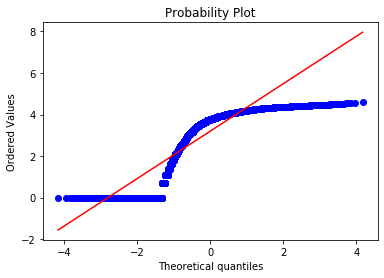

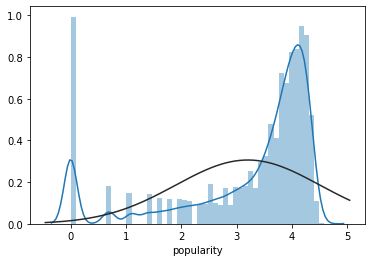

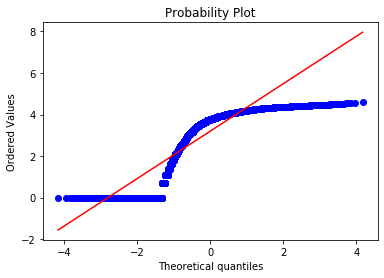

In [63]:
#applying log transformation by replacing zeros with ones
tds2 = tds1
#tds2 = tds2.loc[dataframe3['popularity'] != 0]
tds2.loc[tds2['popularity'] == 0, 'popularity'] = 1
#tds2['popularity'].value_counts(0)
#transformed histogram and normal probability plot
y_lg = np.log(tds2['popularity'])
sns.distplot(y_lg, fit=norm);
fig = plt.figure()
res = stats.probplot(y_lg, plot=plt)
fig

# Linear Regression

## Define Datasets 

In [5]:
#Combined Dataset
dfcombine = tds1
#dfcombine = dfcombine.reset_index(inplace=True, drop=True)

#Target Dataset
dfy = pd.DataFrame(tds1["popularity"])

#all the independant variables/predictors are named as dfx
dfx = dfcombine.drop(columns=['Artist', 'Track','popularity'])
dfx.head()

,followers,instrumentalness,acousticness,danceability,duration_ms,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1627956,0.014100,0.05910,0.646,307413,0.840,8,0.0516,-8.213,1,0.0283,125.187,4,0.716
1,10469,0.000035,0.00119,0.496,191160,0.928,1,0.0988,-2.367,0,0.0469,144.932,4,0.561
2,5505368,0.000000,0.09090,0.586,213720,0.692,8,0.0567,-5.143,1,0.1770,158.041,4,0.457
3,880039,0.002050,0.00361,0.643,210667,0.896,0,0.9010,-6.662,1,0.0359,130.011,4,0.338
4,13,0.776000,0.00328,0.699,119053,0.974,9,0.2900,-5.576,0,0.1500,125.934,4,0.443


In [6]:
dfy.head()

,popularity
0,38
1,11
2,31
3,0
4,2


In [7]:
#trying to get rid of >ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
np.where(dfx.values >= np.finfo(np.float64).max)
np.isnan(dfx.values.any())
dfx.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
#trying to get rid of >ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
np.where(dfy.values >= np.finfo(np.float64).max)
np.isnan(dfy.values.any())
dfy.replace([np.inf, -np.inf], np.nan, inplace=True)

## Train Set  - Linear Regression 

In [9]:
dfx.reset_index(inplace=True, drop=True)
dfy.reset_index(inplace=True, drop=True)
dfy.shape

(45157, 1)

In [10]:
#to perform the train test split of the data, the train test split function is imported from sklearn
from sklearn.model_selection import train_test_split
#the percentage of the split is taken as 30%. SO the percentage of training is 70%
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=42)

In [11]:
# linear regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#the target is predicted for the test dataset
predictions = model.predict(X_test)
#the accuracy of the prediction is found to be.... 
model.score(X_test,y_test)

0.22164320209621935

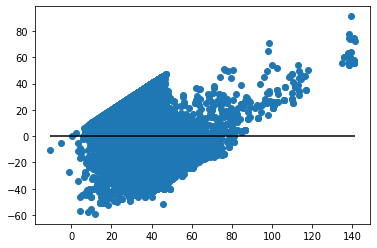

In [13]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
# Plot Residuals
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

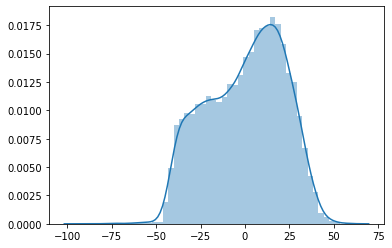

In [15]:
error = y_test - predictions
#the error is calculated for the above test predictions and a distribution plot is plotted.
sns.distplot(error)

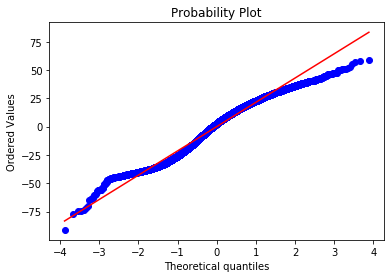

In [16]:
fig = plt.figure()
res = stats.probplot(error['popularity'], plot=plt)

## Regression With Scaler 

In [106]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [107]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [108]:
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
#the target is predicted for the test dataset
predictions = model.predict(X_test_scaled)
#the accuracy of the prediction is found to be.... 
model.score(X_test_scaled,y_test)

0.221643202096097

## OLS Regression  

In [22]:
oness = np.ones((len(dfx),1),dtype = int)
dfone = pd.DataFrame(oness, columns = ['ones'])
dfxnew = dfone.join(dfx)
dfxnew.head()


,ones,followers,instrumentalness,acousticness,danceability,duration_ms,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1,1627956,0.014100,0.05910,0.646,307413,0.840,8,0.0516,-8.213,1,0.0283,125.187,4,0.716
1,1,10469,0.000035,0.00119,0.496,191160,0.928,1,0.0988,-2.367,0,0.0469,144.932,4,0.561
2,1,5505368,0.000000,0.09090,0.586,213720,0.692,8,0.0567,-5.143,1,0.1770,158.041,4,0.457
3,1,880039,0.002050,0.00361,0.643,210667,0.896,0,0.9010,-6.662,1,0.0359,130.011,4,0.338
4,1,13,0.776000,0.00328,0.699,119053,0.974,9,0.2900,-5.576,0,0.1500,125.934,4,0.443


In [23]:
dfxnew.reset_index(inplace=True, drop=True)
dfy.reset_index(inplace=True, drop=True)
print(dfy.shape)
print(dfxnew.shape)

(45157, 1)
(45157, 15)


In [24]:
import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as lm

In [25]:
#OLS Regression - ,
lir_ols = lm.OLS(endog = dfy, exog = dfxnew).fit()
lir_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     928.4
Date:                Fri, 17 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:11:52   Log-Likelihood:            -2.0319e+05
No. Observations:               45157   AIC:                         4.064e+05
Df Residuals:                   45142   BIC:                         4.065e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ones                31.0190      1.551     20.003      0.000      27.980      34.058
followers         1.517e-06   2.01e-08     75.537      0.000    1.48e-06    1.56e-06
instrumentalness   -20.2453      0.416    -48.611      0.000     -21.062     -19.429
acousticness        -1.2114      0.478     -2.536      0.011      -2.148      -0.275
danceability        16.4977      0.742     22.248      0.000      15.044      17.951
duration_ms      -1.004e-05   1.27e-06     -7.888      0.000   -1.25e-05   -7.54e-06
energy              -5.0893      0.862     -5.904      0.000      -6.779      -3.400
key                 -0.0478      0.029     -1.648      0.099      -0.105       0.009
liveness           -10.3430      0.653    -15.847      0.000     -11.622      -9.064
loudness             0.2994      0.040      7.419      0.000       0.220       0.379
mode                 0.2108      0.220      0.959      0.338      -0.220       0.642
speechiness        -18.5304      1.045    -17.732      0.000     -20.579     -16.482
tempo               -0.0056      0.004     -1.518      0.129      -0.013       0.002
time_signature       3.0681      0.290     10.583      0.000       2.500       3.636
valence             -1.8805      0.495     -3.796      0.000      -2.851      -0.910
==============================================================================
Omnibus:                     6423.014   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1922.388
Skew:                          -0.236   Prob(JB):                         0.00
Kurtosis:                       2.107   Cond. No.                     9.03e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## RMSE Model with Plot

In [19]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

RMSE on Training set : 21.80797025735142
RMSE on Test set : 21.734659162421977


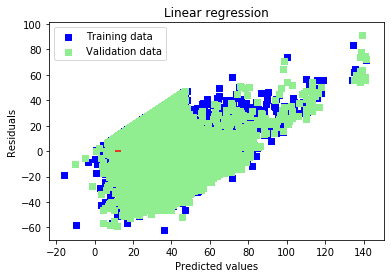

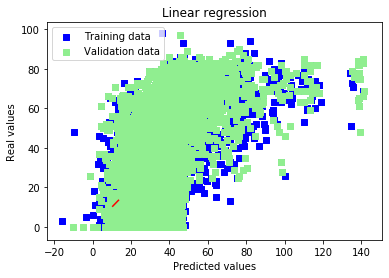

In [20]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Classification Models 

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

##  Dataframe & Feature Set-up 

In [125]:
dataframe = tds1
dataframe.shape


(45157, 18)

Text(0.5, 1.0, 'Popularity Distribution')

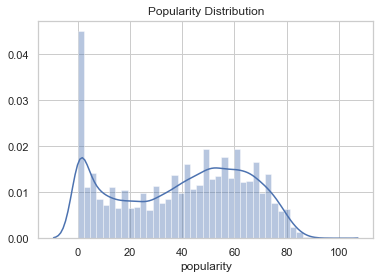

In [126]:
sns.distplot(dataframe['popularity']).set_title('Popularity Distribution')

In [127]:
#dataframe.loc[dataframe['popularity'] == 0]
dataframe.describe()

,followers,instrumentalness,popularity,acousticness,danceability,duration_ms,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,log_popularity
count,4.515700e+04,45157.000000,45157.000000,45157.000000,45157.000000,4.515700e+04,45157.000000,45157.000000,45157.000000,45157.000000,45157.000000,45157.000000,45157.000000,45157.000000,45157.000000,4.515700e+04
mean,1.890777e+06,0.124477,39.472994,0.278239,0.593009,2.310003e+05,0.631839,5.276015,0.190949,-8.223496,0.648094,0.090158,120.917113,3.930841,0.516775,-inf
std,5.217369e+06,0.274807,24.712035,0.307571,0.171259,8.312010e+04,0.232142,3.581349,0.163793,4.300239,0.477570,0.102903,29.012747,0.363697,0.255033,NaN
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.627000e+03,0.000020,0.000000,0.000000,-54.909000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf
25%,1.646100e+04,0.000000,17.000000,0.019000,0.482000,1.870670e+05,0.475000,2.000000,0.093100,-10.197000,0.000000,0.035400,98.257000,4.000000,0.313000,2.833213e+00
50%,1.751950e+05,0.000060,43.000000,0.141000,0.606000,2.191200e+05,0.662000,5.000000,0.124000,-7.256000,1.000000,0.049200,120.014000,4.000000,0.515000,3.761200e+00
75%,1.075210e+06,0.021200,60.000000,0.490000,0.720000,2.594130e+05,0.822000,8.000000,0.240000,-5.261000,1.000000,0.093700,138.841000,4.000000,0.725000,4.094345e+00
max,6.237875e+07,0.999000,98.000000,0.996000,0.988000,2.752254e+06,1.000000,11.000000,0.998000,4.405000,1.000000,0.963000,245.941000,5.000000,0.998000,4.584967e+00


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


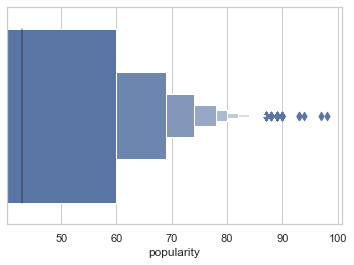

In [128]:
import seaborn as sns

sns.set(style="whitegrid")

tips = sns.load_dataset("tips")

ax = sns.boxenplot(x=dataframe['popularity'])

In [129]:
#Convert popularity to binary varible. 
#we will define above 20 as "popular" since that's the border of the top 25% of songs and encode that as 1,
#and below 75 as "not popular" and encode that as 0.

dataframe.loc[dataframe['popularity'] < 60, 'popularity'] = 0 
dataframe.loc[dataframe['popularity'] >= 60, 'popularity'] = 1
#dataframe.loc[dataframe['popularity'] == 0]


In [130]:
dataframe['popularity'].value_counts()

0    33443
1    11714
Name: popularity, dtype: int64

In [131]:
features = ["danceability", "energy", "followers", "key", "liveness" ,'instrumentalness', 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

In [132]:
#Next we define 80% of the dataframe for training and 20% of the dataframe for testing.
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features]

In [133]:
#We add a validation dataset using train_test_split.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

## Logistic Regresssion 

In [134]:
#Logistic Regression
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_valid, LR_Predict) 
print("AUC: " + str(LR_AUC))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7890949349570994
AUC: 0.6235751545208452


## RandomForestClassifier

In [135]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.9108773872128425
AUC: 0.8722260486686635


## K-Nearest Neighbors Classifier

In [136]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.8295045668419596
AUC: 0.771022999233199


## Decision Tree Classifier

In [137]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.8819540548021035
AUC: 0.8628865622493687


## Model Performance Summary

In [138]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      ],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy]})

model_performance_AUC = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier'],
                                            'AUC': [LR_AUC,
                                                         RFC_AUC,
                                                         KNN_AUC,
                                                         DT_AUC]})

In [139]:
model_performance_accuracy


,Model,Accuracy
0,LogisticRegression,0.789095
1,RandomForestClassifier,0.910877
2,KNeighborsClassifier,0.829505
3,DecisionTreeClassifier,0.881954


In [89]:
model_performance_AUC

,Model,AUC
0,LogisticRegression,0.623575
1,RandomForestClassifier,0.873438
2,KNeighborsClassifier,0.770755
3,DecisionTreeClassifier,0.870944


# Revise LR Assumptions

In [3]:
file = "features_45k.csv"
tds = pd.read_csv(file)
tds = tds[['Artist', 'Track', 'followers','popularity','acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]
tds.head()

,Artist,Track,followers,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Lionel Richie,Tonight Will Be Alright,1627956,38,0.05910,0.646,307413,0.840,0.014100,8,0.0516,-8.213,1,0.0283,125.187,4,0.716
1,Course Of Nature,The Window,10469,11,0.00119,0.496,191160,0.928,0.000035,1,0.0988,-2.367,0,0.0469,144.932,4,0.561
2,Mariah Carey,Inseparable,5505368,31,0.09090,0.586,213720,0.692,0.000000,8,0.0567,-5.143,1,0.1770,158.041,4,0.457
3,Extra Virgin,One Night,880039,0,0.00361,0.643,210667,0.896,0.002050,0,0.9010,-6.662,1,0.0359,130.011,4,0.338
4,Joe and Will Ask?,Claymore,13,2,0.00328,0.699,119053,0.974,0.776000,9,0.2900,-5.576,0,0.1500,125.934,4,0.443


In [5]:
#dataframe2 = tds
#dataframe.loc[dataframe['popularity'] < 53, 'popularity'] = 0 
#dataframe.loc[dataframe['popularity'] >= 53, 'popularity'] = 1
#dataframe2.loc[dataframe2['popularity'] == 5]

In [6]:
#print(dataframe2.shape)
#dataframe2.head()

In [7]:
dataframe3= tds
print(dataframe3.shape)


(45157, 17)


In [22]:
#remove popularity values 0 to (15) to improve distribution shape
dataframe3 = dataframe3.loc[dataframe3['popularity'] != 0]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 1]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 2]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 3]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 4]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 5]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 6]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 7]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 8]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 9]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 10]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 11]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 12]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 13]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 14]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 15]

In [23]:
dataframe3.shape

(42194, 17)

Text(0.5, 1.0, 'Popularity Distribution')

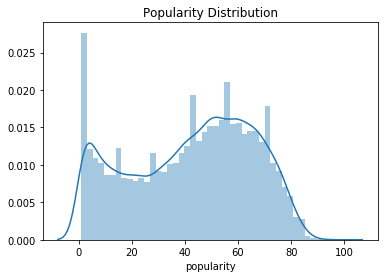

In [24]:
sns.distplot(dataframe3['popularity']).set_title('Popularity Distribution')

In [25]:
dataframe3.describe()

,followers,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,4.219400e+04,42194.000000,42194.000000,42194.000000,4.219400e+04,42194.000000,42194.000000,42194.000000,42194.000000,42194.000000,42194.000000,42194.000000,42194.000000,42194.000000,42194.000000
mean,2.015558e+06,42.244916,0.275112,0.596551,2.300662e+05,0.634686,0.111635,5.277504,0.190116,-8.093289,0.646537,0.089997,120.990545,3.936128,0.519519
std,5.374865e+06,23.161769,0.303652,0.169123,7.869451e+04,0.229529,0.261451,3.581295,0.162520,4.191140,0.478050,0.100872,28.893410,0.346879,0.253422
min,0.000000e+00,1.000000,0.000000,0.000000,3.034700e+04,0.000020,0.000000,0.000000,0.009990,-40.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.402800e+04,23.000000,0.020200,0.486000,1.878210e+05,0.480000,0.000000,2.000000,0.093300,-10.027000,0.000000,0.035400,98.307500,4.000000,0.317000
50%,2.174960e+05,46.000000,0.141000,0.609000,2.189200e+05,0.664000,0.000044,5.000000,0.124000,-7.147000,1.000000,0.049200,120.004000,4.000000,0.518000
75%,1.242686e+06,61.000000,0.481000,0.721000,2.581600e+05,0.822000,0.013200,8.000000,0.239000,-5.199000,1.000000,0.094600,139.016750,4.000000,0.727000
max,6.237875e+07,98.000000,0.996000,0.988000,2.752254e+06,1.000000,0.999000,11.000000,0.998000,4.405000,1.000000,0.961000,245.941000,5.000000,0.998000


In [26]:
#Combined Dataset
dfcombine = dataframe3
#dfcombine = dfcombine.reset_index(inplace=True, drop=True)
#Target Dataset
dfy = pd.DataFrame(dataframe3["popularity"])
#all the independant variables/predictors are named as dfx
dfx = dfcombine.drop(columns=['Artist', 'Track','popularity'])
dfx.head()

,followers,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1627956,0.05910,0.646,307413,0.840,0.014100,8,0.0516,-8.213,1,0.0283,125.187,4,0.716
1,10469,0.00119,0.496,191160,0.928,0.000035,1,0.0988,-2.367,0,0.0469,144.932,4,0.561
2,5505368,0.09090,0.586,213720,0.692,0.000000,8,0.0567,-5.143,1,0.1770,158.041,4,0.457
4,13,0.00328,0.699,119053,0.974,0.776000,9,0.2900,-5.576,0,0.1500,125.934,4,0.443
5,238795,0.00407,0.338,238600,0.938,0.000000,9,0.3230,-4.001,1,0.1030,177.984,4,0.311


In [27]:
dfy.head()

,popularity
0,38
1,11
2,31
4,2
5,6


In [28]:
dfx.reset_index(inplace=True, drop=True)
dfy.reset_index(inplace=True, drop=True)


In [29]:
#to perform the train test split of the data, the train test split function is imported from sklearn
from sklearn.model_selection import train_test_split
#the percentage of the split is taken as 30%. SO the percentage of training is 70%
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=42)

In [30]:
# linear regression 
from sklearn.linear_model import LinearRegression
linR = LinearRegression()
linR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#the target is predicted for the test dataset
predictions = linR.predict(X_test)
#the accuracy of the prediction is found to be.... 
linR.score(X_test,y_test)

0.2043070007547283

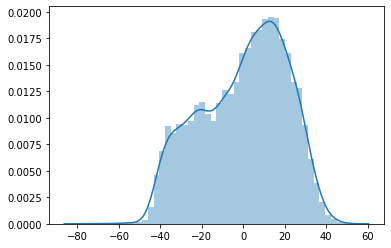

In [32]:
error = y_test - predictions
#the error is calculated for the above test predictions and a distribution plot is plotted.
sns.distplot(error)

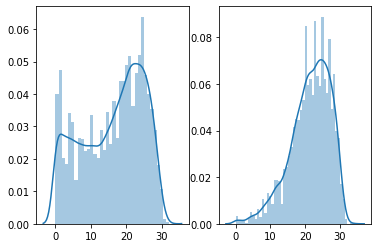

In [33]:
#BoxCox Transformation 

# import modules
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# generate non-normal data
original_data = dfy['popularity']

# split into testing & training data
train,test = train_test_split(original_data, shuffle=False)

# transform training data & save lambda value
train_data,fitted_lambda = stats.boxcox(train)

# use lambda value to transform test data
test_data = stats.boxcox(test, fitted_lambda)

# (optional) plot train & test
fig, ax=plt.subplots(1,2)
sns.distplot(train_data, ax=ax[0])
sns.distplot(test_data, ax=ax[1])

Text(0.5, 0, 'Popularity')

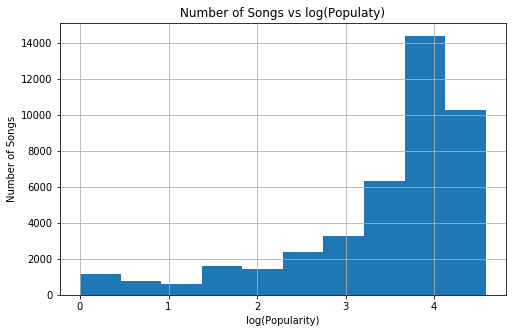

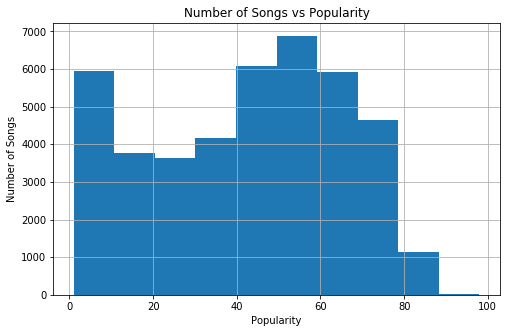

In [34]:
dfy['log_popularity'] = np.log(dfy['popularity'])

dfy.hist('log_popularity',figsize=(8,5))
plt.title('Number of Songs vs log(Populaty)')
plt.ylabel('Number of Songs')
plt.xlabel("log(Popularity)")


dfy.hist('popularity',figsize=(8,5))
plt.title('Number of Songs vs Popularity')
plt.ylabel('Number of Songs')
plt.xlabel("Popularity")


In [37]:
dfy_l = pd.DataFrame(dfy['log_popularity'])
dfy_l.shape

(42194, 1)

In [38]:
dfx.shape

(42194, 14)

In [66]:
X_train, X_test, y_train_l, y_test_l = train_test_split(dfx, dfy_l, test_size=0.3, random_state=42)
linR2 = LinearRegression()
linR2.fit(X_train, y_train_l)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
predictions2 = linR2.predict(X_test)
#the accuracy of the prediction is found to be.... 
linR2.score(X_test,y_test_l)


0.13281158672062576

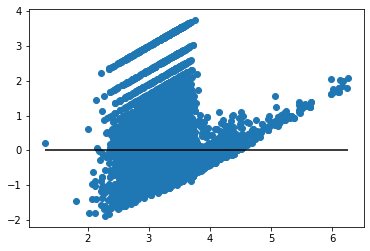

In [69]:
from sklearn.metrics import accuracy_score
predictions2 = linR2.predict(X_test)
# Plot Residuals
plt.scatter(predictions2, predictions2 - y_test_l)
plt.hlines(y=0, xmin=predictions2.min(), xmax=predictions2.max())
plt.show()

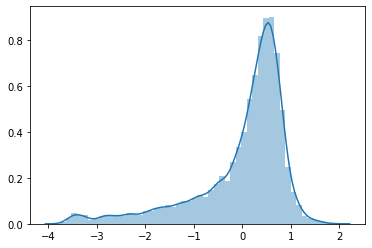

In [70]:
error2 = y_test_l - predictions2
#the error is calculated for the above test predictions and a distribution plot is plotted.
sns.distplot(error2)


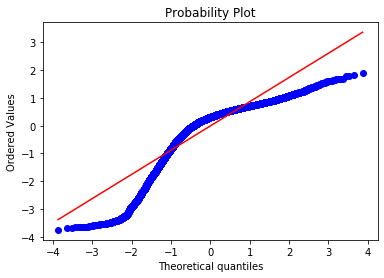

In [74]:
fig = plt.figure()
res = stats.probplot(error2['log_popularity'], plot=plt)

## Once More Run - with fewer variables

In [21]:
dfx2 = dfxnew.drop(['time_signature','key','mode'], axis = 1)
dfx2.head()

NameError: name 'dfxnew' is not defined

In [117]:
#OLS Regression
lir_ols = lm.OLS(endog = dfy, exog = dfx2).fit()
lir_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     1168.
Date:                Thu, 16 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:31:30   Log-Likelihood:            -2.0325e+05
No. Observations:               45157   AIC:                         4.065e+05
Df Residuals:                   45145   BIC:                         4.066e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ones                42.0510      1.116     37.667      0.000      39.863      44.239
followers         1.518e-06   2.01e-08     75.527      0.000    1.48e-06    1.56e-06
instrumentalness   -20.3337      0.416    -48.833      0.000     -21.150     -19.518
acousticness        -1.4501      0.478     -3.036      0.002      -2.386      -0.514
danceability        17.4306      0.734     23.749      0.000      15.992      18.869
duration_ms      -9.855e-06   1.27e-06     -7.743      0.000   -1.23e-05   -7.36e-06
energy              -4.6271      0.862     -5.371      0.000      -6.316      -2.938
liveness           -10.3804      0.653    -15.888      0.000     -11.661      -9.100
loudness             0.2962      0.040      7.332      0.000       0.217       0.375
speechiness        -18.7001      1.044    -17.916      0.000     -20.746     -16.654
tempo               -0.0050      0.004     -1.359      0.174      -0.012       0.002
valence             -1.8290      0.496     -3.689      0.000      -2.801      -0.857
==============================================================================
Omnibus:                     6604.818   Durbin-Watson:                   0.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1942.747
Skew:                          -0.236   Prob(JB):                         0.00
Kurtosis:                       2.100   Cond. No.                     7.65e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.65e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#the percentage of the split is taken as 30%. SO the percentage of training is 70%
X_train2, X_test2, y_train2, y_test2 = train_test_split(dfx2, dfy, test_size=0.3, random_state=42)
linR2 = LinearRegression()
linR2.fit(X_train2, y_train2)
#the target is predicted for the test dataset
predictions = linR2.predict(X_test2)
#the accuracy of the prediction is found to be.... 
linR2.score(X_test2,y_test2)

NameError: name 'dfx2' is not defined

0.21900177702209822